In [47]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 

In [48]:
data = pd.read_csv("cdata.csv")
data.head(5)

,x,y,cluster
0,2.1364,0.8369,1
1,7.4096,-1.4137,3
2,5.0996,1.1552,0
3,7.8149,-1.0186,3
4,1.8925,1.2714,1


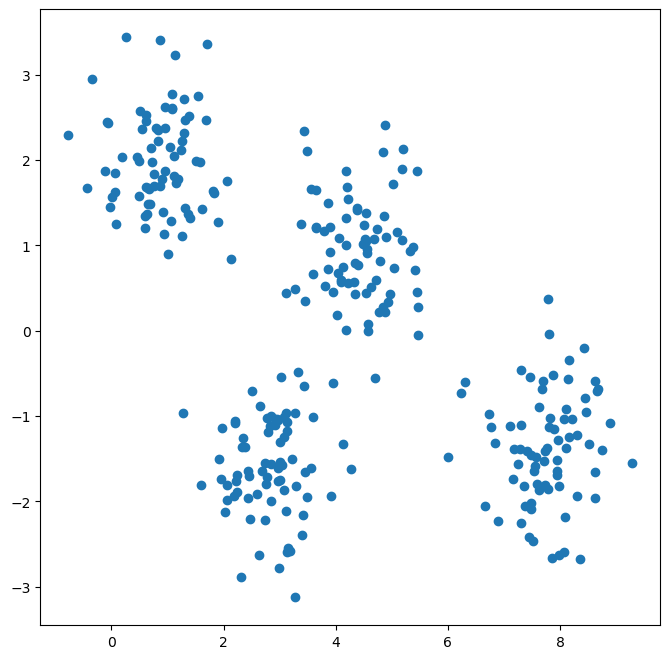

In [49]:
plt.figure(figsize=(8,8))
plt.scatter(data['x'],data['y'])
plt.show()

#　k-means

- 1.select K data point as initial centorids
- 2.repeat step3.step4
- 3.   Form K clusters by assigning all points to the closet centorids
- 4.   Recompute the centroid of each cluster
- 5.until the ceentorids don't change

In [86]:
#implement 
#step1 choice samples from data and define k4
init_x = np.random.uniform(low=min(data['x']),high=max(data['x']),size=4)
init_y = np.random.uniform(low=min(data['y']),high=max(data['y']),size=4)

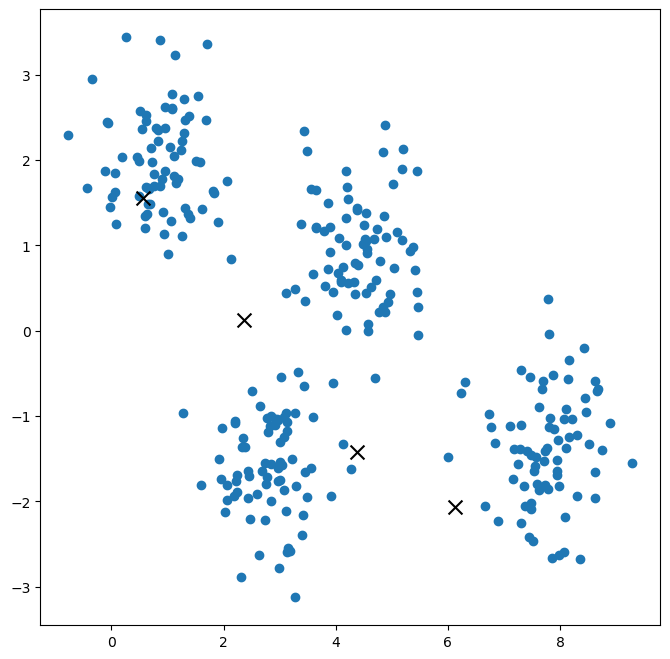

In [87]:
plt.figure(figsize=(8,8))
plt.scatter(data['x'],data['y'])
plt.scatter(init_x,init_y,marker="x",s=100,c='black')
plt.show()

In [88]:
def assign_cluster(point,init_x,init_y):
    
    init = zip(init_x,init_y)
    cluster = 0
    min_dist = 1000

    for i , init_point in enumerate(init):
        
        dist_x = point['x'] - init_point[0]
        dist_y = point['y'] - init_point[1]
        dist = np.sqrt(dist_x**2 + dist_y**2)
        
        if dist < min_dist:
            min_dist = dist
            cluster = i
    return cluster

In [89]:
# Form K clusters by assigning all points to the closet centorids
train_data =data.loc[:,'x':'y']
data['pred'] = train_data.apply(assign_cluster,axis=1,args=(init_x,init_y))

In [90]:
data

,x,y,cluster,pred
0,2.1364,0.8369,1,1
1,7.4096,-1.4137,3,2
2,5.0996,1.1552,0,0
3,7.8149,-1.0186,3,2
4,1.8925,1.2714,1,1
...,...,...,...,...
295,1.5798,1.9737,1,3
296,1.3918,2.5183,1,3
297,4.5359,0.4390,0,0
298,7.7911,0.3695,3,2


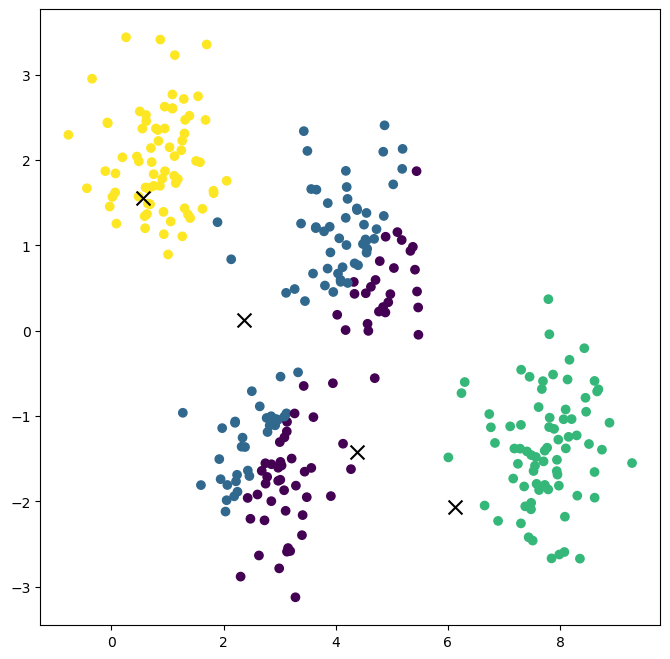

In [91]:
colors = {0:"tomato",1:"deepskyblue",2:"darkseagreen",3:"violet"}
color_map = data['pred'].map(colors)

plt.figure(figsize=(8,8))
plt.scatter(data['x'],data['y'],c=data['pred'])
plt.scatter(init_x,init_y,marker="x",s=100,c='black')
plt.show()

In [105]:
# Recompute the centroid of each cluster
new_centroid = data.groupby('pred').mean()
new_centroid = new_centroid.loc[:,'x':'y']

In [109]:
data['pred'] = train_data.apply(assign_cluster,axis=1,args=(new_centroid['x'],new_centroid['y']))
data

,x,y,cluster,pred
0,2.1364,0.8369,1,1
1,7.4096,-1.4137,3,2
2,5.0996,1.1552,0,1
3,7.8149,-1.0186,3,2
4,1.8925,1.2714,1,3
...,...,...,...,...
295,1.5798,1.9737,1,3
296,1.3918,2.5183,1,3
297,4.5359,0.4390,0,1
298,7.7911,0.3695,3,2


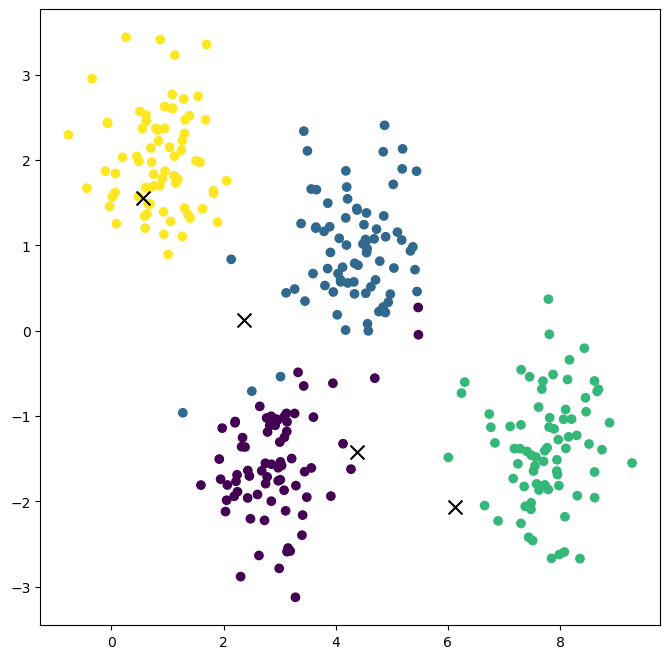

In [110]:
colors = {0:"tomato",1:"deepskyblue",2:"darkseagreen",3:"violet"}
color_map = data['pred'].map(colors)

plt.figure(figsize=(8,8))
plt.scatter(data['x'],data['y'],c=data['pred'])
plt.scatter(init_x,init_y,marker="x",s=100,c='black')
plt.show()

In [125]:
def kmeans(data,k,iterations=4):
    #step1 choice samples from data and define k4
    init_x = np.random.uniform(low=min(data['x']),high=max(data['x']),size=k)
    init_y = np.random.uniform(low=min(data['y']),high=max(data['y']),size=k)
    for i in range(iterations):
        train_data =data.loc[:,'x':'y']
        
        # Form K clusters by assigning all points to the closet centorids
        data['pred'] = train_data.apply(assign_cluster,axis=1,args=(init_x,init_y))
        
        ## Recompute the centroid of each cluster
        new_centroid = data.groupby('pred').mean()
        
        # until the ceentorids don't change
        if np.array_equal(np.array(new_centroid['x']),init_x) :
            break
        else:
            init_x = new_centroid['x']
            init_y = new_centroid['y']
        

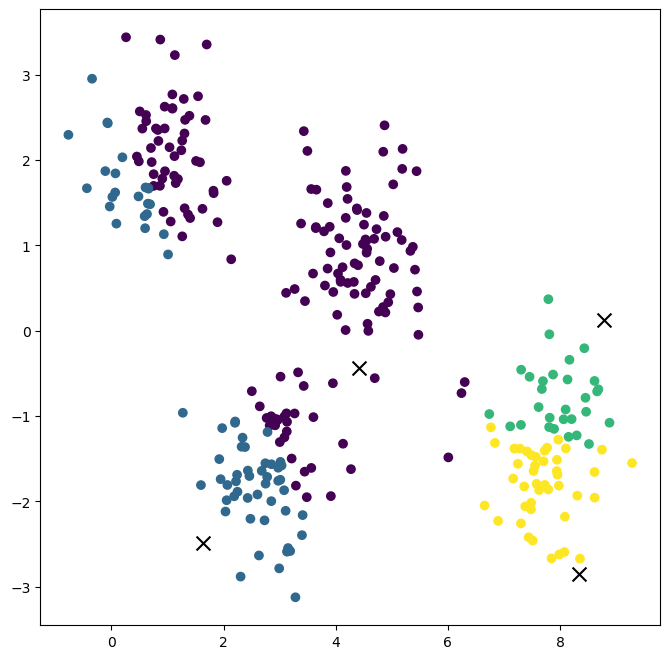

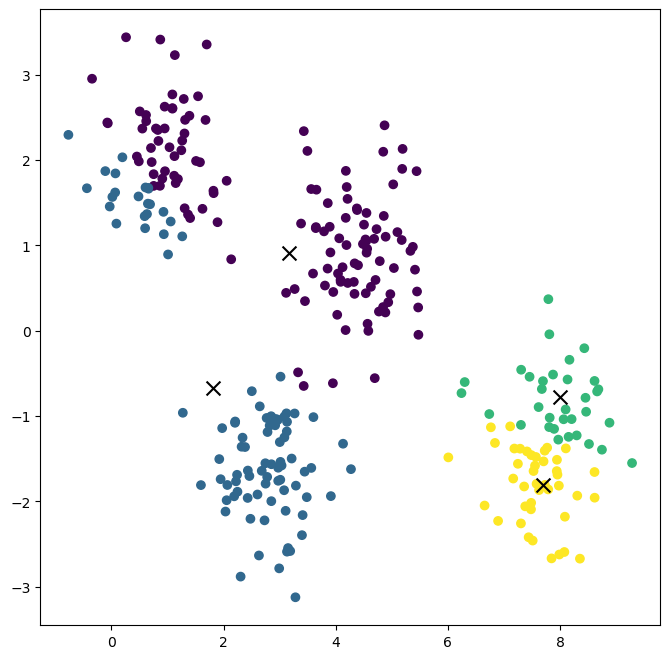

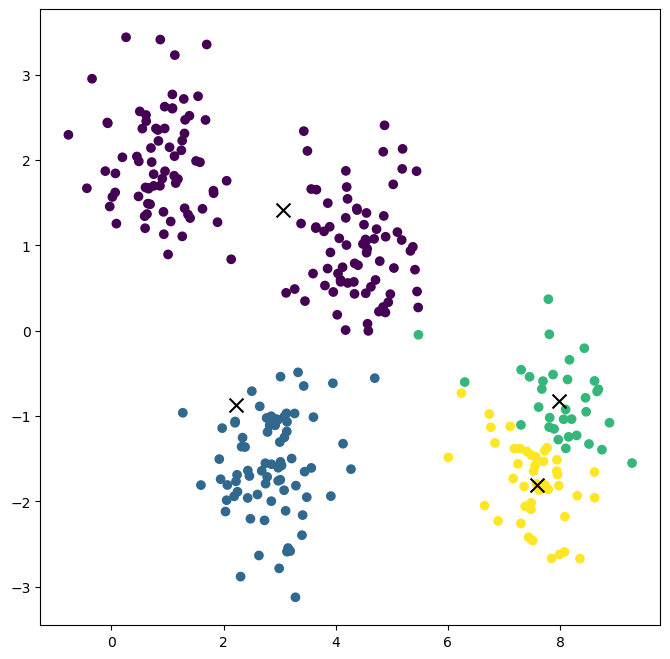

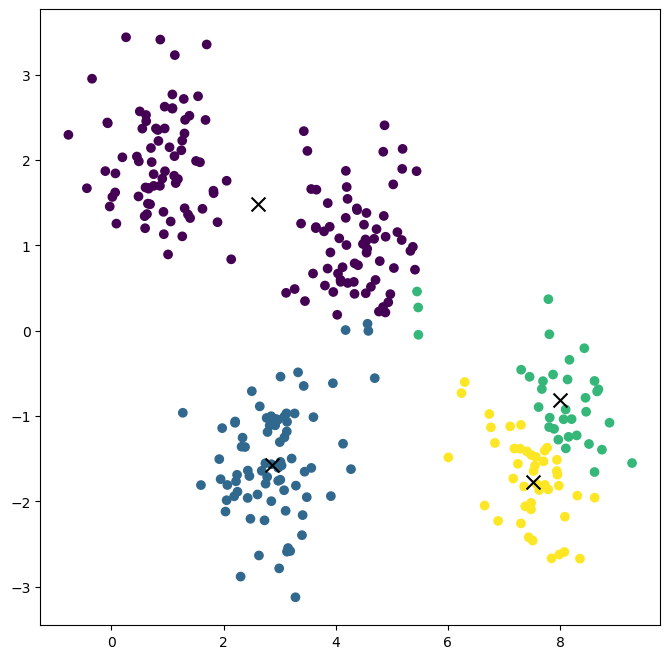

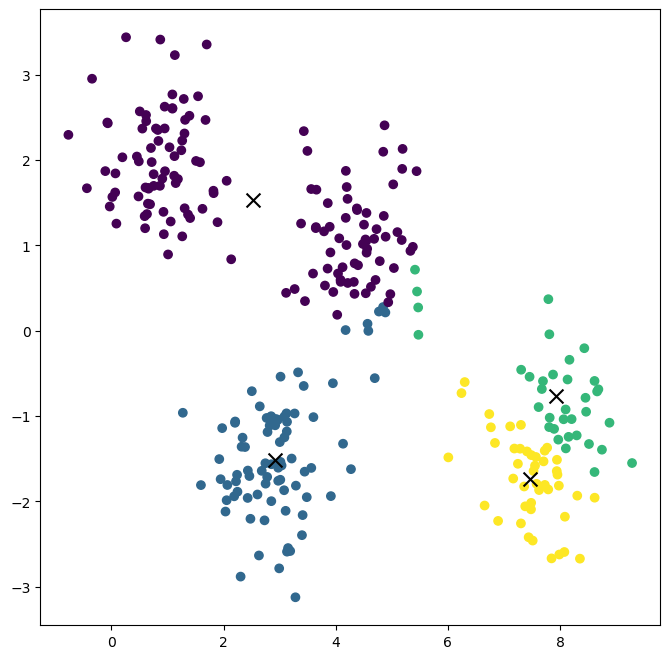

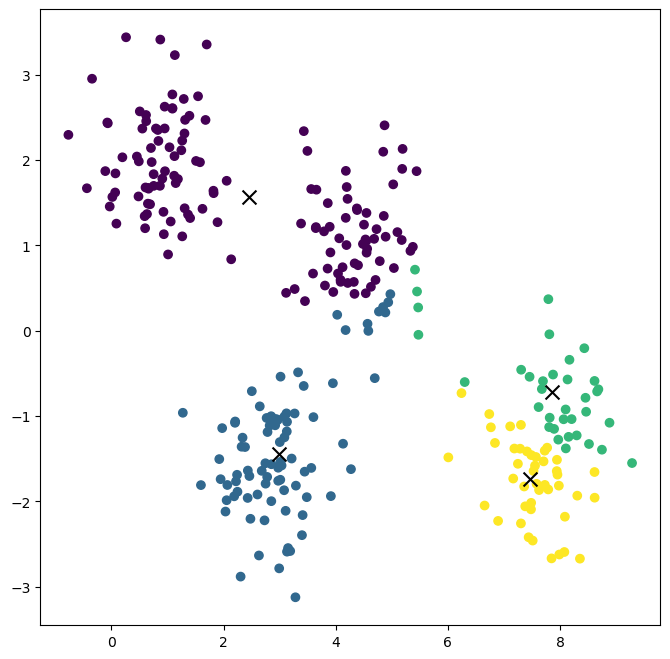

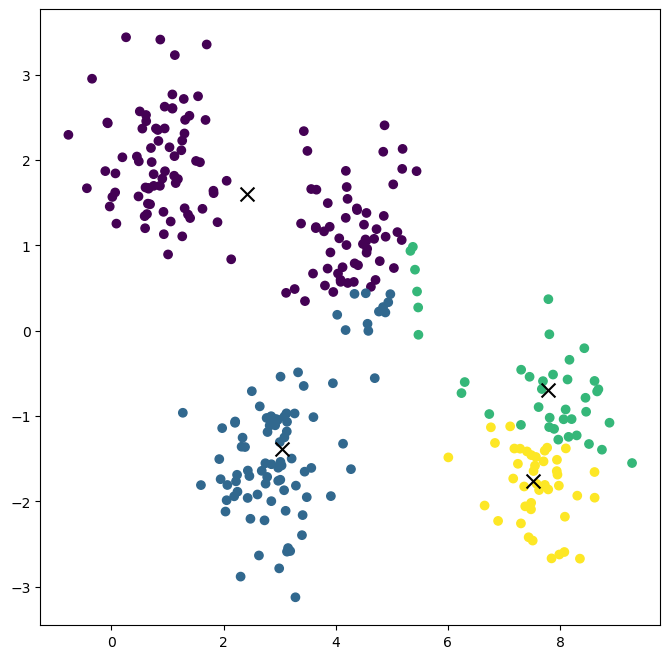

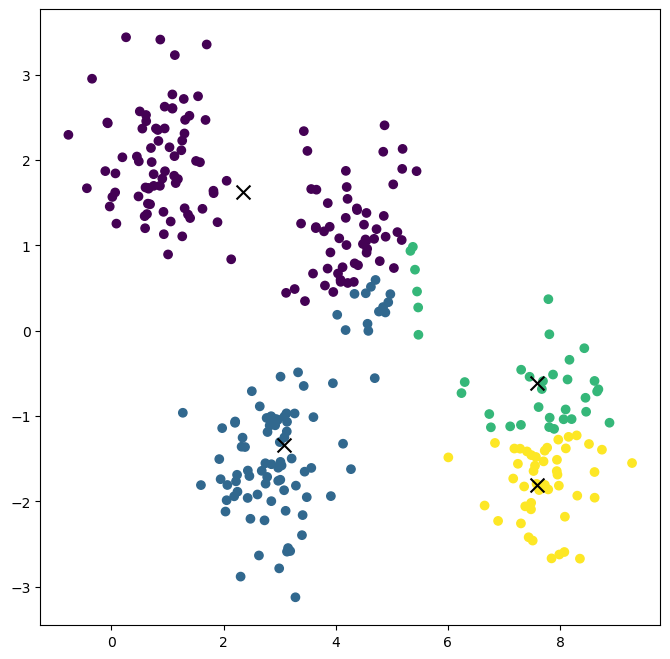

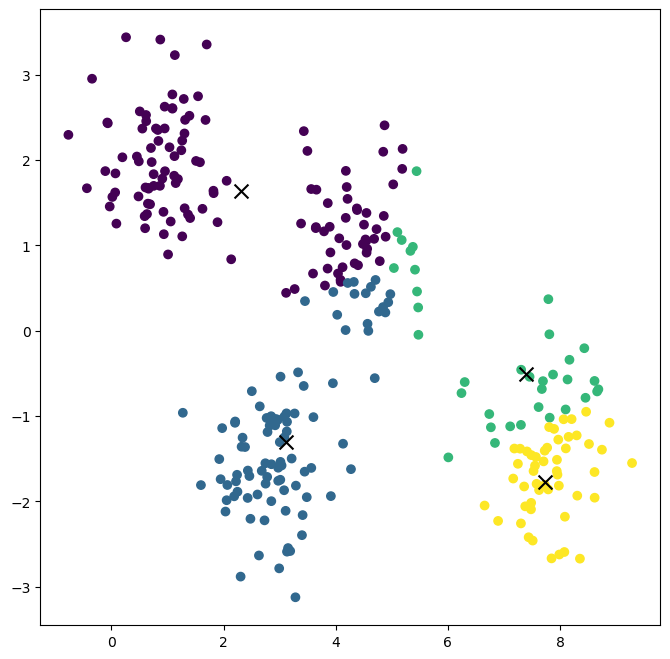

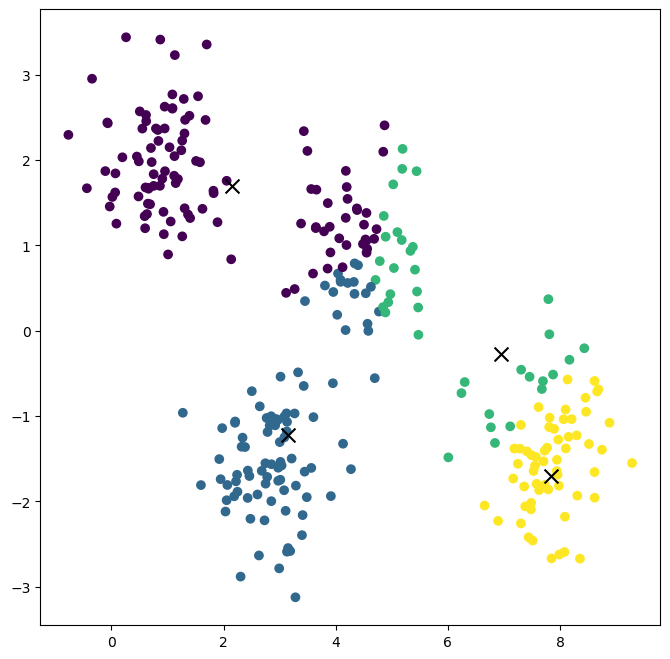

In [126]:
kmeans(data,4,iterations=10)